In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DL_datafiles/bank-full.csv', delimiter = ';')
data = data.sample(frac = 1, random_state = 42)
data = data.head(10000)

data.head()

Mounted at /content/drive


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
10254,40,services,single,secondary,no,316,no,no,unknown,11,jun,122,5,-1,0,unknown,no
36116,37,services,married,secondary,no,217,yes,no,cellular,11,may,152,1,-1,0,unknown,no
15100,34,management,married,tertiary,no,4943,yes,no,cellular,17,jul,118,2,-1,0,unknown,no
39458,26,blue-collar,single,tertiary,no,567,no,no,cellular,25,may,421,1,-1,0,unknown,yes
7649,31,blue-collar,married,unknown,yes,-13,yes,no,unknown,30,may,176,4,-1,0,unknown,no


In [ ]:
data.describe()
data.replace({'default': {'no': 0, 'yes': 1},
              'housing': {'no': 0, 'yes': 1},
              'loan': {'no': 0, 'yes': 1},
              'y': {'no': 0, 'yes': 1}}, inplace = True)


,age,balance,day,duration,campaign,pdays,previous
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.000300,1416.579400,15.84400,258.257400,2.814100,39.701900,0.555100
std,10.579617,3319.181897,8.34174,258.007002,3.169345,98.538811,1.791169
min,18.000000,-3372.000000,1.00000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,70.000000,8.00000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,439.000000,16.00000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.250000,21.00000,318.250000,3.000000,-1.000000,0.000000
max,88.000000,81204.000000,31.00000,3785.000000,51.000000,828.000000,58.000000


In [ ]:
# Create dummy variables:
dummy_cols = ['job','marital','education','contact','day','month','poutcome']
model_data = pd.get_dummies(data, columns = dummy_cols)

# BASELINE - LOGISTIC REGRESSION
# Split data into train and test sets:
from sklearn.model_selection import train_test_split
X_rest, X_dev, y_rest, y_dev = train_test_split(model_data.drop(['y'],axis = 1), model_data['y'], test_size=0.10, random_state=42, stratify = model_data['y'])
X_train, X_test, y_train, y_test = train_test_split(X_rest, y_rest, test_size=0.223, random_state=42, stratify = y_rest)

X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

cols_to_scale = ['age','balance','duration','campaign','pdays','previous']
X_train_scaled[cols_to_scale] = pd.DataFrame(scaler.fit_transform(X_train_scaled[cols_to_scale]))
X_test_scaled[cols_to_scale] = pd.DataFrame(scaler.transform(X_test_scaled[cols_to_scale]))

X_train_scaled.columns = X_train.columns
X_test_scaled.columns = X_train.columns

import statsmodels.api as sm

baseline_model = sm.Logit(y_train.values.reshape(-1,1),X_train_scaled).fit()
baseline_model.summary()

Optimization terminated successfully.
         Current function value: 0.234350
         Iterations 8


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 6993
Model:                          Logit   Df Residuals:                     6921
Method:                           MLE   Df Model:                           71
Date:                Fri, 29 Apr 2022   Pseudo R-squ.:                  0.3500
Time:                        20:26:00   Log-Likelihood:                -1638.8
converged:                       True   LL-Null:                       -2521.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                     0.3570      0.394      0.905      0.365      -0.416       1.130
default                -0.3810      0.437     -0.872      0.383      -1.237       0.475
balance                 0.6316      0.791      0.799      0.424      -0.918       2.181
housing                -0.4159      0.112     -3.700      0.000      -0.636      -0.196
loan                   -0.5593      0.161     -3.469      0.001      -0.875      -0.243
duration               16.2030      0.636     25.483      0.000      14.957      17.449
campaign               -5.3864      1.300     -4.145      0.000      -7.934      -2.839
pdays                   0.8076      0.647      1.248      0.212      -0.461       2.076
previous                0.2110      1.445      0.146      0.884      -2.621       3.043
job_admin.              7.4847        nan        nan        nan         nan         nan
job_blue-collar         7.3789        nan        nan        nan         nan         nan
job_entrepreneur        6.7931        nan        nan        nan         nan         nan
job_housemaid           6.7420        nan        nan        nan         nan         nan
job_management          7.5753        nan        nan        nan         nan         nan
job_retired             7.5026        nan        nan        nan         nan         nan
job_self-employed       7.5746        nan        nan        nan         nan         nan
job_services            7.2077        nan        nan        nan         nan         nan
job_student             8.4506        nan        nan        nan         nan         nan
job_technician          7.4228        nan        nan        nan         nan         nan
job_unemployed          7.1877        nan        nan        nan         nan         nan
job_unknown             7.4384        nan        nan        nan         nan         nan
marital_divorced       -0.3448        nan        nan        nan         nan         nan
marital_married        -0.7273   2.14e+06  -3.39e-07      1.000    -4.2e+06     4.2e+06
marital_single         -0.4850   1.66e+06  -2.92e-07      1.000   -3.25e+06    3.25e+06
education_primary      -8.2364        nan        nan        nan         nan         nan
education_secondary    -8.2343        nan        nan        nan         nan         nan
education_tertiary     -8.1412        nan        nan        nan         nan         nan
education_unknown      -8.1876        nan        nan        nan         nan         nan
contact_cellular       -0.1376        nan        nan        nan         nan         nan
contact_telephone      -0.1742        nan        nan        nan         nan         nan
contact_unknown        -1.6718        nan        nan        nan         nan         nan
day_1                   0.5249        nan        nan        nan         nan         nan
day_2                  -0.2672        nan        nan        nan         nan         nan
day_3                  -0.5406        nan        nan        nan         n

In [ ]:
def evaluate_model(preds, actuals):
    print(f'Accuracy:{metrics.accuracy_score(actuals,preds):0.2f}')
    confusion_matrix = metrics.confusion_matrix(actuals,preds)
    #sns.heatmap(confusion_matrix, annot = True, fmt = 'g')
    print(confusion_matrix)
    precision = confusion_matrix[1,1]/(confusion_matrix[1,1] + confusion_matrix[0,1])
    recall = confusion_matrix[1,1]/(confusion_matrix[1,1] + confusion_matrix[1,0])
    f1score = (2*precision*recall)/(precision + recall)
    kappa = metrics.cohen_kappa_score(preds,actuals)
    print(f'Precision:{precision:0.2f}')
    print(f'Recall:{recall:0.2f}')
    print(f'F1-score:{f1score:0.2f}')
    print(f'Kappa-Statistic:{kappa:0.2f}')

In [ ]:
print('Train results - ')
preds_train = baseline_model.predict(X_train_scaled)
preds_train = np.where(preds_train >= 0.5, 1, 0)
evaluate_model(preds_train, y_train)
print('Test results - ')
preds = baseline_model.predict(X_test_scaled)
preds = np.where(preds >= 0.5, 1, 0)
evaluate_model(preds, y_test)

Train results - 
Accuracy:0.91
[[6034  142]
 [ 509  308]]
Precision:0.68
Recall:0.38
F1-score:0.49
Kappa-Statistic:0.44
Test results - 
Accuracy:0.91
[[1737   36]
 [ 148   86]]
Precision:0.70
Recall:0.37
F1-score:0.48
Kappa-Statistic:0.44


In [ ]:
# EDA on dev set:(X_test, y_test here)
X_rest, X_dev, y_rest, y_dev = train_test_split(data.drop(['y'],axis = 1), data['y'], test_size=0.10, random_state=42, stratify = data['y'])
X_train, X_test, y_train, y_test = train_test_split(X_rest, y_rest, test_size=0.223, random_state=42, stratify = y_rest)

dev_set = pd.concat([X_test,y_test], axis = 1)
print(dev_set.shape)
print(dev_set[dev_set['pdays'] == -1].shape)
print(dev_set[dev_set['previous'] == 0].shape)

(2007, 17)
(1680, 17)
(1680, 17)


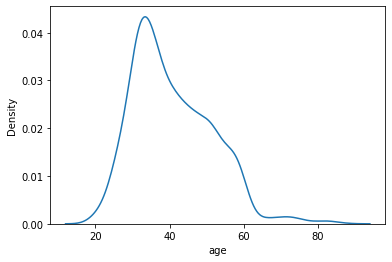

In [ ]:
sns.kdeplot(dev_set['age'])

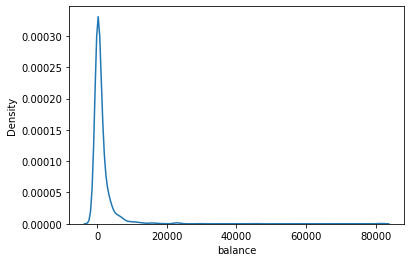

In [ ]:
sns.kdeplot(dev_set['balance'])

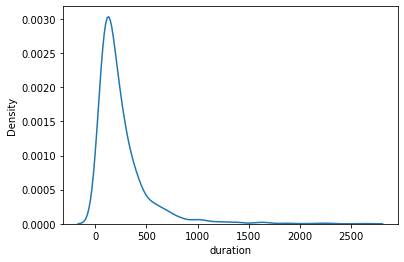

In [ ]:
sns.kdeplot(dev_set['duration'])

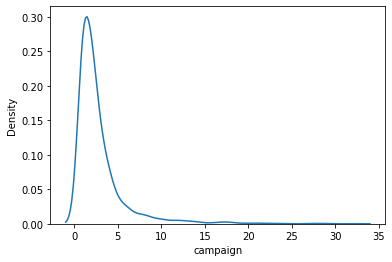

In [ ]:
sns.kdeplot(dev_set['campaign'])

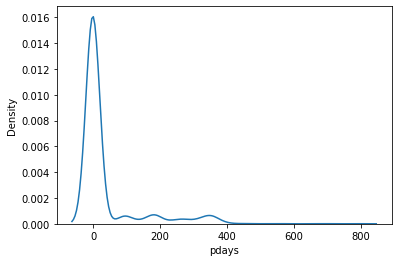

In [ ]:
sns.kdeplot(dev_set['pdays'])

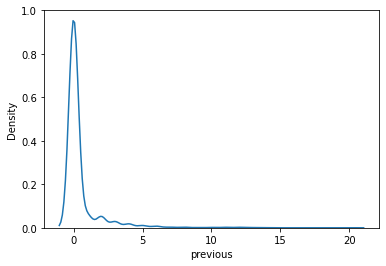

In [ ]:
sns.kdeplot(dev_set['previous'])

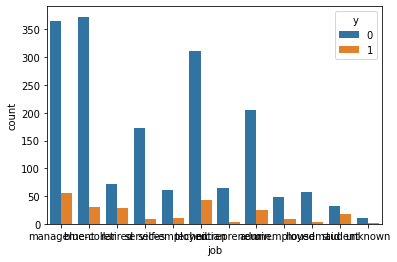

In [ ]:
# Job, education, Month, Day -> Categorical features
sns.countplot(x = 'job',hue = 'y',data = dev_set)

In [ ]:
dev_set.job.value_counts()

management       421
blue-collar      403
technician       353
admin.           229
services         181
retired          101
self-employed     70
entrepreneur      68
housemaid         61
unemployed        58
student           50
unknown           12
Name: job, dtype: int64

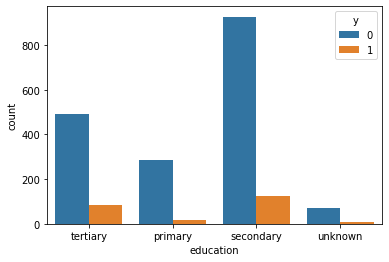

In [ ]:
sns.countplot(x = 'education',hue = 'y',data = dev_set)

In [ ]:
dev_set.education.value_counts()

secondary    1050
tertiary      574
primary       303
unknown        80
Name: education, dtype: int64

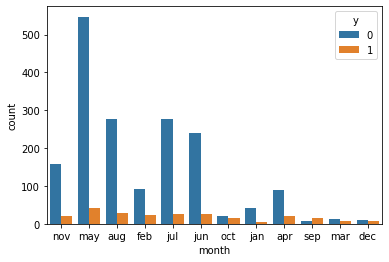

In [ ]:
sns.countplot(x = 'month',hue = 'y',data = dev_set)

In [ ]:
dev_set.month.value_counts()

may    588
aug    305
jul    304
jun    265
nov    178
feb    115
apr    111
jan     47
oct     35
sep     22
mar     20
dec     17
Name: month, dtype: int64

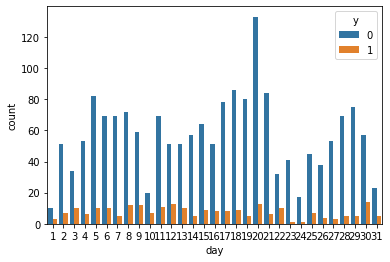

In [ ]:
sns.countplot(x = 'day',hue = 'y',data = dev_set)

In [ ]:
# Data preparation based on EDA on dev set:
data_backup = data.copy()

#Continuous:
data['pdays'] = np.where(data['pdays'] == -1,999,data['pdays'])
data['time_of_month'] = pd.cut(data['day'], [1, 10, 20, 31], labels=['early_month', 'mid-month', 'late_month'])

#Categorical:
data['job'].replace({'self-employed': 'others', 'entrepreneur': 'others', 'unemployed':'others', 'housemaid':'others', 'student':'others', 'unknown':'others'}, inplace = True)
data['month'].replace({'oct': 'others', 'jan': 'others', 'mar':'others', 'dec':'others'}, inplace = True)
data['education'] = np.where(data['education'] == 'unknown','secondary',data['education'])

In [ ]:
data.drop(columns = ['day'], axis = 1, inplace = True)
dummy_cols = ['job','marital','education','contact','month','poutcome','time_of_month']
model_data = pd.get_dummies(data, columns = dummy_cols)

# BASELINE - LOGISTIC REGRESSION
# Split data into train and test sets:
from sklearn.model_selection import train_test_split
X_rest, X_dev, y_rest, y_dev = train_test_split(model_data.drop(['y'],axis = 1), model_data['y'], test_size=0.10, random_state=42, stratify = model_data['y'])
X_train, X_test, y_train, y_test = train_test_split(X_rest, y_rest, test_size=0.223, random_state=42, stratify = y_rest)

#X_train.reset_index(drop = True, inplace = True)
#X_test.reset_index(drop = True, inplace = True)

dev_set = pd.concat([X_test,y_test], axis = 1)
cv_set = pd.concat([X_train,y_train], axis = 1)
holdout_set = pd.concat([X_dev,y_dev], axis = 1)
print(dev_set.shape)
print(cv_set.shape)
print(holdout_set.shape)

(2007, 42)
(6993, 42)
(1000, 42)


In [ ]:
dev_set.to_csv('/content/drive/MyDrive/DL_datafiles/dev-set.csv', index = False)
cv_set.to_csv('/content/drive/MyDrive/DL_datafiles/cv-set.csv', index = False)
holdout_set.to_csv('/content/drive/MyDrive/DL_datafiles/holdout-set.csv', index = False)

In [ ]:
# Read data:
dev_set = pd.read_csv('/content/drive/MyDrive/DL_datafiles/dev-set.csv')
cv_set = pd.read_csv('/content/drive/MyDrive/DL_datafiles/cv-set.csv')
holdout_set = pd.read_csv('/content/drive/MyDrive/DL_datafiles/holdout-set.csv')

In [ ]:
# Find threshold functions:-
def threshold_from_roc(pred,actuals):
  '''
  pred -> predicted probabilities
  '''
  fpr, tpr, thresholds = roc_curve(actuals, pred)
  # get the best threshold
  J = tpr - fpr
  ix = np.argmax(J)
  best_thresh = thresholds[ix]
  return best_thresh

def threshold_from_precision_recall(pred,actuals):
  precision, recall, thresholds = precision_recall_curve(actuals, pred)
  # convert to f score
  fscore = (2 * precision * recall) / (precision + recall)
  # locate the index of the largest f score
  ix = np.argmax(fscore)
  best_thresh = thresholds[ix]
  return best_thresh

RANDOM FOREST

In [ ]:
# RANDOM FOREST:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 123)
rf.fit(cv_set.drop(['y'],axis = 1),cv_set['y'])

pred_probs = rf.predict_proba(cv_set.drop(['y'],axis = 1))[:,1]
roc_thresh = threshold_from_roc(pred_probs,cv_set['y'])
pr_thresh = threshold_from_precision_recall(pred_probs,cv_set['y'])
print(f'ROC threshold - {roc_thresh}')
print(f'Precision recall threshold - {pr_thresh}')

ROC threshold - 0.51
Precision recall threshold - 0.51


In [ ]:
# Results:
threshold = roc_thresh
#threshold = pr_thresh
print('CV results ------ ')
preds_train = rf.predict_proba(cv_set.drop(['y'],axis = 1))[:,1]
preds_train = np.where(preds_train >= threshold, 1, 0)
evaluate_model(preds_train, cv_set['y'])

print('Dev results ------ ')
preds_train = rf.predict_proba(dev_set.drop(['y'],axis = 1))[:,1]
preds_train = np.where(preds_train >= threshold, 1, 0)
evaluate_model(preds_train, dev_set['y'])

print('Holdout results ------ ')
preds_train = rf.predict_proba(holdout_set.drop(['y'],axis = 1))[:,1]
preds_train = np.where(preds_train >= threshold, 1, 0)
evaluate_model(preds_train, holdout_set['y'])

CV results ------ 
Accuracy:1.00
[[6176    0]
 [   0  817]]
Precision:1.00
Recall:1.00
F1-score:1.00
Kappa-Statistic:1.00
Dev results ------ 
Accuracy:0.91
[[1742   31]
 [ 159   75]]
Precision:0.71
Recall:0.32
F1-score:0.44
Kappa-Statistic:0.40
Holdout results ------ 
Accuracy:0.91
[[865  18]
 [ 73  44]]
Precision:0.71
Recall:0.38
F1-score:0.49
Kappa-Statistic:0.45


In [ ]:
# Hypertuned Random Forest:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(100,500, num = 5)]
max_features = ['sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10,20,num = 6)] + [None]
min_samples_split = [12,14,16,18]
min_samples_leaf = [8,10,12,15]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split':min_samples_split,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
#print(random_grid)

rf_tuned = RandomForestClassifier(random_state = 123)
rf_cv = RandomizedSearchCV(estimator = rf_tuned, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=5, random_state=42, n_jobs = -1)#, scoring = 'neg_log_loss')
#rf_cv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = pds, verbose=5, random_state=42, n_jobs = -1, refit = False )#, scoring = 'neg_log_loss')
rf_cv.fit(cv_set.drop(['y'],axis = 1),cv_set['y'])
print(rf_cv.best_params_)

rf_final = rf_cv.best_estimator_
pred_probs = rf_final.predict_proba(cv_set.drop(['y'],axis = 1))[:,1]
roc_thresh = threshold_from_roc(pred_probs,cv_set['y'])
pr_thresh = threshold_from_precision_recall(pred_probs,cv_set['y'])
print(f'ROC threshold - {roc_thresh}')
print(f'Precision recall threshold - {pr_thresh}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'n_estimators': 300, 'min_samples_split': 14, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 18}
ROC threshold - 0.14865122996329908
Precision recall threshold - 0.27341659532333223


In [ ]:
# Hypertuned Results:
#threshold = roc_thresh
threshold = pr_thresh
print('CV results ------ ')
preds_train = rf_final.predict_proba(cv_set.drop(['y'],axis = 1))[:,1]
preds_train = np.where(preds_train >= threshold, 1, 0)
evaluate_model(preds_train, cv_set['y'])

print('Dev results ------ ')
preds_train = rf_final.predict_proba(dev_set.drop(['y'],axis = 1))[:,1]
preds_train = np.where(preds_train >= threshold, 1, 0)
evaluate_model(preds_train, dev_set['y'])

print('Holdout results ------ ')
preds_train = rf_final.predict_proba(holdout_set.drop(['y'],axis = 1))[:,1]
preds_train = np.where(preds_train >= threshold, 1, 0)
evaluate_model(preds_train, holdout_set['y'])

CV results ------ 
Accuracy:0.91
[[5758  418]
 [ 191  626]]
Precision:0.60
Recall:0.77
F1-score:0.67
Kappa-Statistic:0.62
Dev results ------ 
Accuracy:0.90
[[1647  126]
 [  83  151]]
Precision:0.55
Recall:0.65
F1-score:0.59
Kappa-Statistic:0.53
Holdout results ------ 
Accuracy:0.90
[[823  60]
 [ 37  80]]
Precision:0.57
Recall:0.68
F1-score:0.62
Kappa-Statistic:0.57


XGBOOST

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 123)
xgb.fit(cv_set.drop(['y'],axis = 1),cv_set['y'])

pred_probs = xgb.predict_proba(cv_set.drop(['y'],axis = 1))[:,1]
roc_thresh = threshold_from_roc(pred_probs,cv_set['y'])
pr_thresh = threshold_from_precision_recall(pred_probs,cv_set['y'])
print(f'ROC threshold - {roc_thresh}')
print(f'Precision recall threshold - {pr_thresh}')

ROC threshold - 0.121451236307621
Precision recall threshold - 0.2965819537639618


In [ ]:
# Results:
#threshold = roc_thresh
threshold = pr_thresh
print('CV results ------ ')
preds_train = xgb.predict_proba(cv_set.drop(['y'],axis = 1))[:,1]
preds_train = np.where(preds_train >= threshold, 1, 0)
evaluate_model(preds_train, cv_set['y'])

print('Dev results ------ ')
preds_train = xgb.predict_proba(dev_set.drop(['y'],axis = 1))[:,1]
preds_train = np.where(preds_train >= threshold, 1, 0)
evaluate_model(preds_train, dev_set['y'])

print('Holdout results ------ ')
preds_train = xgb.predict_proba(holdout_set.drop(['y'],axis = 1))[:,1]
preds_train = np.where(preds_train >= threshold, 1, 0)
evaluate_model(preds_train, holdout_set['y'])

CV results ------ 
Accuracy:0.91
[[5818  358]
 [ 266  551]]
Precision:0.61
Recall:0.67
F1-score:0.64
Kappa-Statistic:0.59
Dev results ------ 
Accuracy:0.90
[[1667  106]
 [  90  144]]
Precision:0.58
Recall:0.62
F1-score:0.60
Kappa-Statistic:0.54
Holdout results ------ 
Accuracy:0.91
[[836  47]
 [ 47  70]]
Precision:0.60
Recall:0.60
F1-score:0.60
Kappa-Statistic:0.55


In [ ]:
# Hypertuned XGBOOST:
n_estimators = [int(x) for x in np.linspace(100,500, num = 5)]
min_child_weight = [1,2,3]
max_depth = [int(x) for x in np.linspace(6,10,num = 5)]
eta = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
gamma = [0,0.1,0.2,0.4]
colsample_bytree = [0.7,0.8,0.9]
#subsample = [0.7,0.8,0.9]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'min_child_weight': min_child_weight,
               'max_depth':max_depth,
               'eta': eta,
               'gamma': gamma,
               'colsample_bytree': colsample_bytree}
               #'subsample': subsample}

#print(random_grid)

xgb_tuned = XGBClassifier(random_state = 123)
xgb_cv = RandomizedSearchCV(estimator = xgb_tuned, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=5, random_state=42, n_jobs = -1 )#, scoring = 'neg_log_loss')
xgb_cv.fit(cv_set.drop(['y'],axis = 1),cv_set['y'])
print(xgb_cv.best_params_)

xgb_final = xgb_cv.best_estimator_
pred_probs = xgb_final.predict_proba(cv_set.drop(['y'],axis = 1))[:,1]
roc_thresh = threshold_from_roc(pred_probs,cv_set['y'])
pr_thresh = threshold_from_precision_recall(pred_probs,cv_set['y'])
print(f'ROC threshold - {roc_thresh}')
print(f'Precision recall threshold - {pr_thresh}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 6, 'gamma': 0.1, 'eta': 0.3, 'colsample_bytree': 0.8}
ROC threshold - 0.17610496282577515
Precision recall threshold - 0.3145902752876282


In [ ]:
# Hypertuned Results:
#threshold = roc_thresh
threshold = pr_thresh
print('CV results ------ ')
preds_train = xgb_final.predict_proba(cv_set.drop(['y'],axis = 1))[:,1]
preds_train = np.where(preds_train >= threshold, 1, 0)
evaluate_model(preds_train, cv_set['y'])

print('Dev results ------ ')
preds_train = xgb_final.predict_proba(dev_set.drop(['y'],axis = 1))[:,1]
preds_train = np.where(preds_train >= threshold, 1, 0)
evaluate_model(preds_train, dev_set['y'])

print('Holdout results ------ ')
preds_train = xgb_final.predict_proba(holdout_set.drop(['y'],axis = 1))[:,1]
preds_train = np.where(preds_train >= threshold, 1, 0)
evaluate_model(preds_train, holdout_set['y'])

CV results ------ 
Accuracy:0.94
[[5915  261]
 [ 154  663]]
Precision:0.72
Recall:0.81
F1-score:0.76
Kappa-Statistic:0.73
Dev results ------ 
Accuracy:0.90
[[1662  111]
 [  91  143]]
Precision:0.56
Recall:0.61
F1-score:0.59
Kappa-Statistic:0.53
Holdout results ------ 
Accuracy:0.91
[[837  46]
 [ 43  74]]
Precision:0.62
Recall:0.63
F1-score:0.62
Kappa-Statistic:0.57


LOGISTIC REGRESSION

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_cv_scaled = cv_set.drop(['y'],axis = 1).copy()
X_holdout_scaled = holdout_set.drop(['y'],axis = 1).copy()
X_dev_scaled = dev_set.drop(['y'],axis = 1).copy()

X_cv_scaled.reset_index(drop = True, inplace = True)
X_holdout_scaled.reset_index(drop = True, inplace = True)
X_dev_scaled.reset_index(drop = True, inplace = True)

cols_to_scale = ['age','balance','duration','campaign','pdays','previous']
X_cv_scaled[cols_to_scale] = pd.DataFrame(scaler.fit_transform(X_cv_scaled[cols_to_scale]))
X_holdout_scaled[cols_to_scale] = pd.DataFrame(scaler.transform(X_holdout_scaled[cols_to_scale]))
X_dev_scaled[cols_to_scale] = pd.DataFrame(scaler.transform(X_dev_scaled[cols_to_scale]))

import statsmodels.api as sm

model = sm.Logit(cv_set['y'],X_cv_scaled).fit()
print(model.summary())

pred_probs = model.predict(X_cv_scaled)
roc_thresh = threshold_from_roc(pred_probs,cv_set['y'])
pr_thresh = threshold_from_precision_recall(pred_probs,cv_set['y'])
print(f'ROC threshold - {roc_thresh}')
print(f'Precision recall threshold - {pr_thresh}')

Optimization terminated successfully.
         Current function value: 0.244770
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 6993
Model:                          Logit   Df Residuals:                     6957
Method:                           MLE   Df Model:                           35
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                  0.3211
Time:                        13:54:41   Log-Likelihood:                -1711.7
converged:                       True   LL-Null:                       -2521.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
age                           0.0528      0.372      0.142      0.887      -0.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


<Figure size 432x288 with 0 Axes>

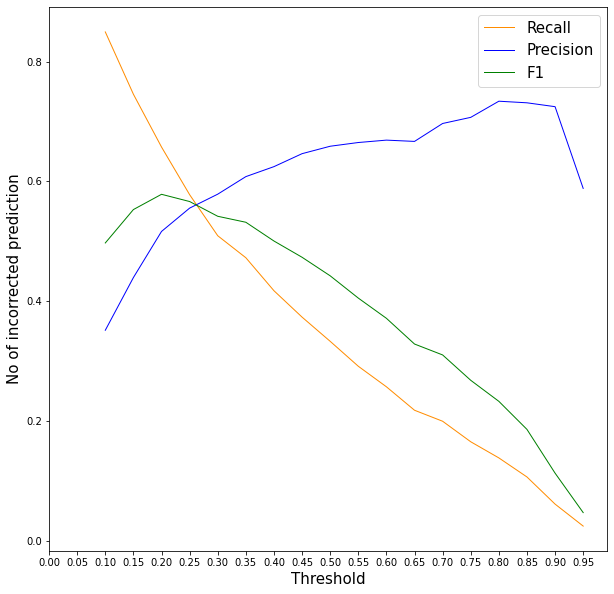

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def set_picture_size(x, y):
    plt.figure()
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = x
    fig_size[1] = y
    
def changing_thr_plot(pred,test):
    '''
    #function to test model performance under different thresholds
    '''
    miss_list=[]
    over_pred_list=[]
    error_list=[]
    f1_list = []

    for thr in np.arange(0.1,1,0.05):
        
        predictions = (pred > thr).astype(int)
        actuals = test.to_list()

        cm = confusion_matrix(actuals, predictions)
        tn, fp, fn, tp = confusion_matrix(actuals, predictions).ravel()
    
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = (2*precision*recall)/(precision + recall)

        miss_list.append(recall)
        over_pred_list.append(precision)
        f1_list.append(f1)
        
    threshold=np.arange(0.1,1,0.05)

    set_picture_size(10,10)
    plt.figure()
    plt.plot(threshold, miss_list, color='darkorange', lw=1, label='Recall' )
    plt.plot(threshold, over_pred_list, color='blue', lw=1, label='Precision' )
    plt.plot(threshold, f1_list, color='green', lw=1, label='F1' )
    plt.xticks(np.arange(0,1,0.05))
    plt.xlabel('Threshold', fontsize = 15)
    plt.ylabel('No of incorrected prediction', fontsize = 15)
    plt.legend(loc="upper right",fontsize=15)
    plt.show()
    #plt.savefig('results_with_different_thr.png')
    #plt.close()

preds_train = model.predict(X_cv_scaled)
changing_thr_plot(preds_train,cv_set['y'])

In [ ]:
#threshold = roc_thresh
threshold = 0.25
print('CV results ------ ')
preds_train = model.predict(X_cv_scaled)
preds_train = np.where(preds_train >= threshold, 1, 0)
evaluate_model(preds_train, cv_set['y'])

print('Dev results ------ ')
preds_train = model.predict(X_dev_scaled)
preds_train = np.where(preds_train >= threshold, 1, 0)
evaluate_model(preds_train, dev_set['y'])

print('Holdout results ------ ')
preds_train = model.predict(X_holdout_scaled)
preds_train = np.where(preds_train >= threshold, 1, 0)
evaluate_model(preds_train, holdout_set['y'])

CV results ------ 
Accuracy:0.90
[[5798  378]
 [ 345  472]]
Precision:0.56
Recall:0.58
F1-score:0.57
Kappa-Statistic:0.51
Dev results ------ 
Accuracy:0.90
[[1675   98]
 [  98  136]]
Precision:0.58
Recall:0.58
F1-score:0.58
Kappa-Statistic:0.53
Holdout results ------ 
Accuracy:0.90
[[832  51]
 [ 53  64]]
Precision:0.56
Recall:0.55
F1-score:0.55
Kappa-Statistic:0.49


In [ ]:
# Feature selection using p-values
def feature_selection(X_train,y_train,included,pval_threshold):
    while True:
        temp_model = sm.Logit(y_train.values.reshape(-1,1),X_train[included]).fit()
        pvalues = temp_model.pvalues
        # pvalues.drop('const',inplace = True)
        remove_var = pvalues.sort_values(ascending = False).index[0]
        remove_pval = pvalues.sort_values(ascending = False)[0]
        if remove_pval > pval_threshold:
            included.pop(included.index(remove_var))
        else:
            return included

included = list(X_cv_scaled.columns)
pval_threshold = 0.05
new_features = feature_selection(X_cv_scaled,cv_set['y'],included,pval_threshold)
new_features

Optimization terminated successfully.
         Current function value: 0.244770
         Iterations 8


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


Optimization terminated successfully.
         Current function value: 0.244770
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.244770
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.244771
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.244771
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.244774
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.244774
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.244775
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.244775
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.244789
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.244822
  

['housing',
 'loan',
 'duration',
 'campaign',
 'marital_married',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'contact_unknown',
 'month_aug',
 'month_jul',
 'month_jun',
 'month_may',
 'month_nov',
 'month_sep',
 'poutcome_success',
 'poutcome_unknown',
 'time_of_month_early_month',
 'time_of_month_mid-month']

Optimization terminated successfully.
         Current function value: 0.246172
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 6993
Model:                          Logit   Df Residuals:                     6974
Method:                           MLE   Df Model:                           18
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                  0.3173
Time:                        14:46:25   Log-Likelihood:                -1721.5
converged:                       True   LL-Null:                       -2521.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
housing                      -0.5117      0.103     -4.988      0.000      -0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


<Figure size 720x720 with 0 Axes>

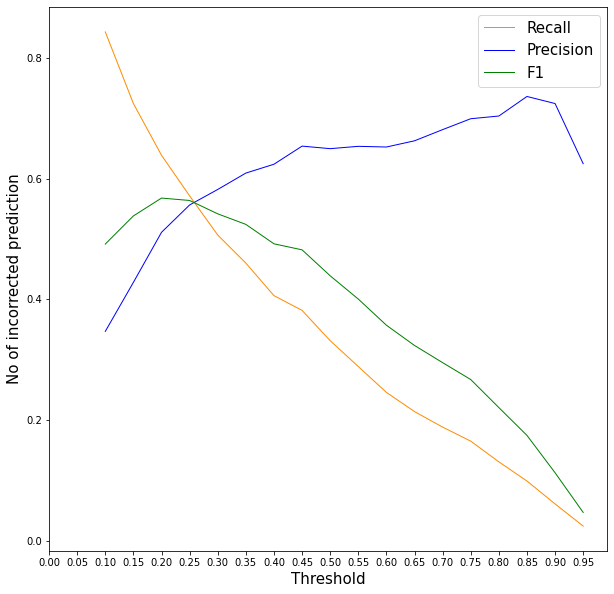

In [ ]:
# Final logit model
logit_model = sm.Logit(cv_set['y'],X_cv_scaled[new_features]).fit()
print(logit_model.summary())

pred_probs = logit_model.predict(X_cv_scaled[new_features])
roc_thresh = threshold_from_roc(pred_probs,cv_set['y'])
pr_thresh = threshold_from_precision_recall(pred_probs,cv_set['y'])
print(f'ROC threshold - {roc_thresh}')
print(f'Precision recall threshold - {pr_thresh}')
changing_thr_plot(pred_probs,cv_set['y'])

In [ ]:
threshold = 0.25
print('CV results ------ ')
preds_train = logit_model.predict(X_cv_scaled[new_features])
preds_train = np.where(preds_train >= threshold, 1, 0)
evaluate_model(preds_train, cv_set['y'])

print('Dev results ------ ')
preds_train = logit_model.predict(X_dev_scaled[new_features])
preds_train = np.where(preds_train >= threshold, 1, 0)
evaluate_model(preds_train, dev_set['y'])

print('Holdout results ------ ')
preds_train = logit_model.predict(X_holdout_scaled[new_features])
preds_train = np.where(preds_train >= threshold, 1, 0)
evaluate_model(preds_train, holdout_set['y'])

CV results ------ 
Accuracy:0.90
[[5804  372]
 [ 350  467]]
Precision:0.56
Recall:0.57
F1-score:0.56
Kappa-Statistic:0.51
Dev results ------ 
Accuracy:0.90
[[1678   95]
 [ 102  132]]
Precision:0.58
Recall:0.56
F1-score:0.57
Kappa-Statistic:0.52
Holdout results ------ 
Accuracy:0.90
[[834  49]
 [ 54  63]]
Precision:0.56
Recall:0.54
F1-score:0.55
Kappa-Statistic:0.49
